In [243]:
import os

# Your project directory
PROJECT_DIR = r"C:\Users\SHUBHAJIT\DataScience\nyc_taxi_project"

# Path to your CSV file (change if you keep CSV elsewhere)
CSV_PATH = r"C:\Users\SHUBHAJIT\DataScience\nyc_taxi_project\train.csv"

# Plots directory inside the project
PLOTS_DIR = os.path.join(PROJECT_DIR, "plots")

# Create directories
os.makedirs(PROJECT_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

print("Project Directory:", PROJECT_DIR)
print("Plots Directory:", PLOTS_DIR)


Project Directory: C:\Users\SHUBHAJIT\DataScience\nyc_taxi_project
Plots Directory: C:\Users\SHUBHAJIT\DataScience\nyc_taxi_project\plots


### ANALYSIS

In [295]:

import pandas as pd
import numpy as np 
from math import radians, sin, cos, sqrt, atan2,asin
import matplotlib.pyplot as plt

In [246]:

df=pd.read_csv(CSV_PATH)

In [247]:
df=data.copy()

### Haversine Function

In [248]:
def haversine(lon1, lat1, lon2, lat2):
 lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 dlon = lon2 - lon1
 dlat = lat2 - lat1
 a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 km = 6367 * 2 * asin(sqrt(a))
 return km

In [249]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [250]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

In [251]:
df.dropna(subset=['pickup_datetime','dropoff_datetime'], inplace=True)

In [252]:
df['trip_duration'] = pd.to_numeric(df['trip_duration'], errors='coerce')
df = df[df['trip_duration'] > 0]

In [253]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [254]:
df['trip_minutes'] = df['trip_duration'] / 60
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.day_name()

In [255]:
df['trip_distance_km'] = df.apply(lambda r: haversine(r['pickup_longitude'], r['pickup_latitude'],r['dropoff_longitude'], r['dropoff_latitude']), axis=1)

In [256]:
df = df[df['trip_distance_km'] < 200]
df = df[df['trip_minutes'] < 1800]

In [298]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_minutes,pickup_hour,pickup_dayofweek,trip_distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333,17,Monday,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000,0,Sunday,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000,11,Tuesday,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000,19,Wednesday,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000,13,Saturday,1.187842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,12.966667,13,Friday,1.224311
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,10.916667,7,Sunday,6.046037
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,12.733333,6,Friday,7.819693
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,6.216667,15,Tuesday,1.091878


In [257]:
df.sample(5000).to_csv(os.path.join(PROJECT_DIR, 'sample_cleaned.csv'), index=False)

### Visualization Section

##### 1. Trip duration distribution

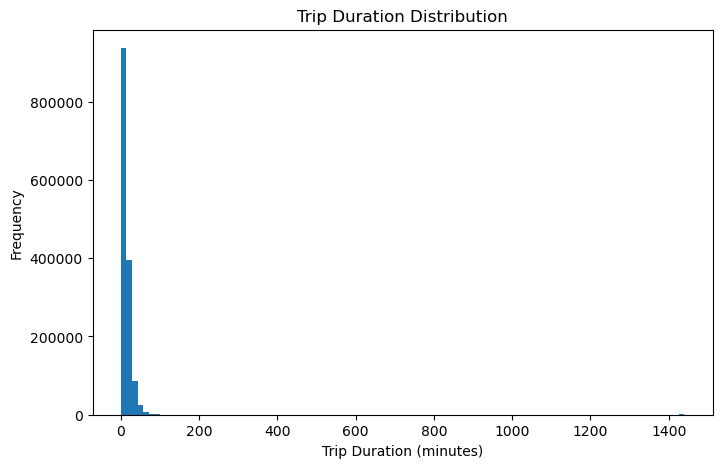

In [260]:
plt.figure(figsize=(8,5))
plt.hist(df['trip_minutes'], bins=100)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.savefig(os.path.join(PLOTS_DIR, "trip_duration_distribution.png"))
plt.show()
plt.close()

##### 2. Trips by pickup hour

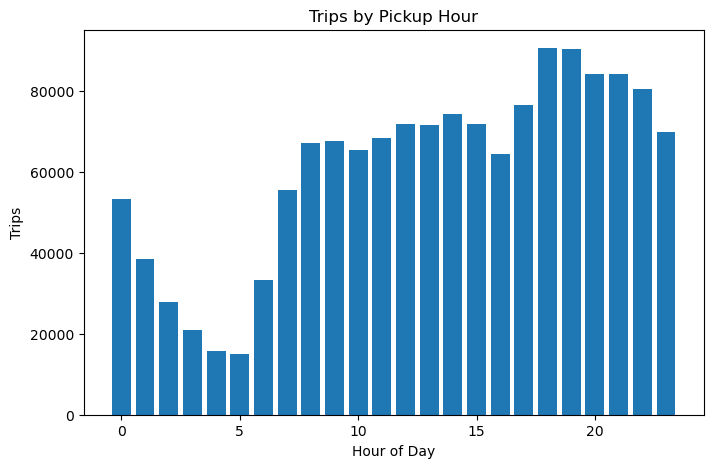

In [262]:
trips_by_hour = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(trips_by_hour.index, trips_by_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Trips")
plt.title("Trips by Pickup Hour")
plt.savefig(os.path.join(PLOTS_DIR, "trips_by_hour.png"))
plt.show()
plt.close()

##### 3. Median trip duration by hour

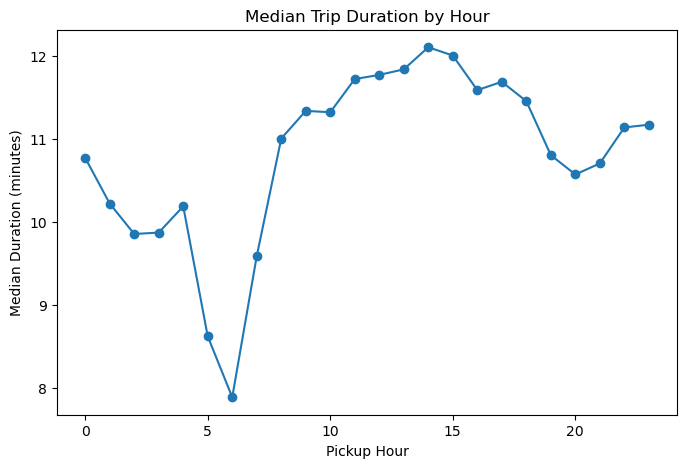

In [264]:
median_hour = df.groupby('pickup_hour')['trip_minutes'].median()
plt.figure(figsize=(8,5))
plt.plot(median_hour.index, median_hour.values, marker='o')
plt.xlabel("Pickup Hour")
plt.ylabel("Median Duration (minutes)")
plt.title("Median Trip Duration by Hour")
plt.savefig(os.path.join(PLOTS_DIR, "median_trip_duration_by_hour.png"))
plt.show()
plt.close()

##### 4. Distance vs Duration Scatter

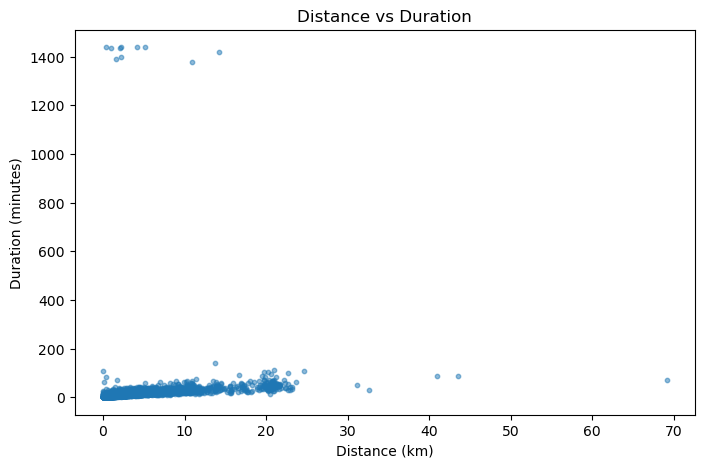

In [266]:
sample = df.sample(5000)
plt.figure(figsize=(8,5))
plt.scatter(sample['trip_distance_km'], sample['trip_minutes'], s=10, alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Duration (minutes)")
plt.title("Distance vs Duration")
plt.savefig(os.path.join(PLOTS_DIR, "distance_vs_duration_scatter.png"))
plt.show()
plt.close()

##### 5. Passenger count distribution

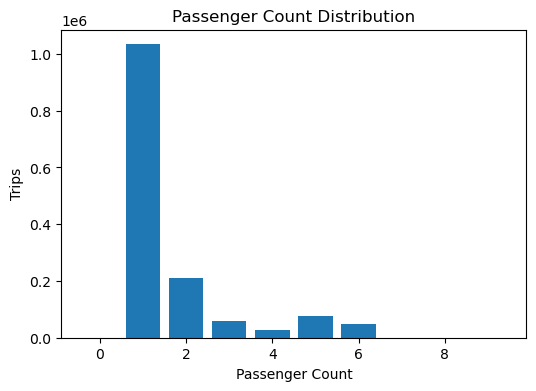

In [268]:
pc = df['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(pc.index, pc.values)
plt.xlabel("Passenger Count")
plt.ylabel("Trips")
plt.title("Passenger Count Distribution")
plt.savefig(os.path.join(PLOTS_DIR, "passenger_count_distribution.png"))
plt.show()
plt.close()

##### 6. Vendor comparison

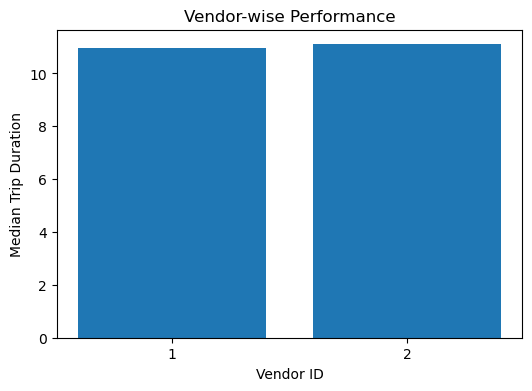

In [270]:

vendor_median = df.groupby('vendor_id')['trip_minutes'].median()
plt.figure(figsize=(6,4))
plt.bar(vendor_median.index.astype(str), vendor_median.values)
plt.xlabel("Vendor ID")
plt.ylabel("Median Trip Duration")
plt.title("Vendor-wise Performance")
plt.savefig(os.path.join(PLOTS_DIR, "vendor_median_trip_duration.png"))
plt.show()
plt.close()

##### 7. Correlation Matrix

In [272]:
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.figure(figsize=(10,7))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.savefig(os.path.join(PLOTS_DIR, "correlation_matrix.png"))
plt.close()
print("All plots saved inside:", PLOTS_DIR)
print("Project complete.")


All plots saved inside: C:\Users\SHUBHAJIT\DataScience\nyc_taxi_project\plots
Project complete.
